In [126]:
%matplotlib inline

In [158]:
import matplotlib.pyplot as plt

In [159]:
def get_fake_bm25_fun(doclen):
    def fake_bm25(tf):
        return tf / (tf + 1.2 * (1.0 - 0.75 + 0.75 * doclen/100.0))
    return fake_bm25

In [171]:
tf = np.arange(1, 20)

In [187]:
f1 = get_fake_bm25_fun(50)
f2 = get_fake_bm25_fun(50)

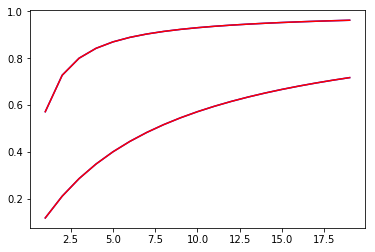

In [188]:
plt.plot(x, f1(tf), c='b')
plt.plot(x, f1(tf*0.1), c='b')

plt.plot(x, f2(tf), c='r')
plt.plot(x, f2(tf*0.1), c='r')

In [189]:
idf = np.log(np.arange(1, 20, 0.01))

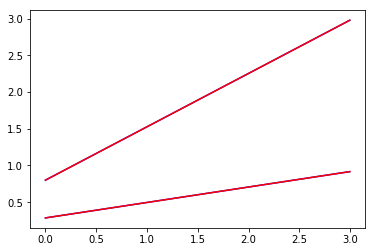

In [190]:
plt.plot(idf, f1(2) * idf + f1(3), c='b')
plt.plot(idf, f1(0.2) * idf + f1(0.3), c='b')

plt.plot(idf, f2(2) * idf + f2(3), c='r')
plt.plot(idf, f2(0.2) * idf + f2(0.3), c='r')

In [166]:
f2(0.1) * idf + f2(0.2)

0.1324110671936759

In [208]:
%load_ext autoreload
%autoreload 2
import json
import pandas as pd
import numpy as np
from collections import defaultdict


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
def loadDict(filename):
    doc2list = defaultdict(list)
    doc2score = defaultdict(list)
    with open(filename) as f:
        for line in f:
            try:
                docid, doclen, tf, tfk, factors, score = line.split("\t")
            except:
                print(docid, doclen, tf, tfk,factors, score)
                print("Finished one query")
                break
            doc2score[int(docid)].append(float(score))
            doc2list[int(docid)].append((int(doclen), float(tf), float(tfk), factors, float(score)))
    return doc2list, doc2score

In [220]:
file10_doc2list, file10_doc2score = loadDict("/home/muntean/terrier-core-4.2/docid_doclen_tf_tfk_factors_score1.0.txt")

999995 488 3.00 0.5849252682212259 1000000.0|93631.0|1.2|2.1288603228290746|8.0|1.0 4.214429587534843

Finished one query


In [221]:
file01_doc2list, file01_doc2score = loadDict("/home/muntean/terrier-core-4.2/docid_doclen_tf_tfk_factors_score0.1.txt")

999995 488 0.30 0.12351471889110843 1000000.0|93631.0|1.2|2.1288603228290746|8.0|1.0 0.889932635965147

Finished one query


### Looking at TF - only aproximation errors

In [222]:
file10_doc2score_summed = [(k, sum(v)) for (k, v) in file10_doc2score.items()]
file10_doc2score_summed_sorted = sorted(file10_doc2score_summed, key=lambda x: x[1], reverse=True)
print(file10_doc2score_summed_sorted[:10])
file10_sorted_docs = [x for (x,y) in file10_doc2score_summed_sorted]

[(66931, 46.566317080636864), (340563, 46.566317080636864), (768155, 36.92471589634317), (217317, 36.8139723090684), (673474, 36.8139723090684), (814306, 36.78642051004854), (483832, 21.801244202807972), (85896, 21.7964135755377), (624132, 21.7964135755377), (666456, 21.75526712968312)]


In [223]:
file10_sorted_docs[:10]

[66931, 340563, 768155, 217317, 673474, 814306, 483832, 85896, 624132, 666456]

In [224]:
file01_doc2score_summed = [(k, sum(v)) for (k, v) in file01_doc2score.items()]
file01_doc2score_summed_sorted = sorted(file01_doc2score_summed, key=lambda x: x[1], reverse=True)
print(file01_doc2score_summed_sorted[:10])
file01_sorted_docs = [x for (x,y) in file01_doc2score_summed_sorted]

[(66931, 15.655305697091801), (340563, 15.655305697091801), (768155, 14.623868037415676), (217317, 14.48343791851347), (673474, 14.48343791851347), (814306, 14.448762517944045), (677892, 9.081306170723883), (483832, 7.442261546410876), (656815, 7.074076381469659), (685753, 7.022892190917457)]


In [225]:
file01_sorted_docs[:10]

[66931, 340563, 768155, 217317, 673474, 814306, 677892, 483832, 656815, 685753]

In [226]:
file01_sorted_docs[:8] == file10_sorted_docs[:8]

False

In [227]:
for i in range(5,10):
    y = file01_sorted_docs[i]
    x = file10_sorted_docs[i]

    print(file01_doc2score_summed_sorted[i], file10_doc2score_summed_sorted[i] )
    #print(file01_doc2list[y],  file10_doc2list[x] )
    print()

(814306, 14.448762517944045) (814306, 36.78642051004854)

(677892, 9.081306170723883) (483832, 21.801244202807972)

(483832, 7.442261546410876) (85896, 21.7964135755377)

(656815, 7.074076381469659) (624132, 21.7964135755377)

(685753, 7.022892190917457) (666456, 21.75526712968312)



In [228]:
for x in [677892, 483832]:
    print(file01_doc2list[x])
    print(file01_sorted_docs.index(x))
    print(file10_sorted_docs.index(x))



[(303, 1.5, 0.5109788276309537, '1000000.0|25.0|1.2|1.4355423725762493|8.0|0.5', 9.081306170723883)]
6
68
[(186, 0.2, 0.1670752192019683, '1000000.0|111847.0|1.2|0.9970656148487868|8.0|0.5', 0.5816936570391134), (186, 0.2, 0.1670752192019683, '1000000.0|56931.0|1.2|0.9970656148487868|8.0|0.5', 0.7881163007437094), (186, 0.5, 0.3339866970697228, '1000000.0|20817.0|1.2|0.9970656148487868|8.0|0.5', 2.1611506728635144), (186, 0.4, 0.2863143976550411, '1000000.0|294.0|1.2|0.9970656148487868|8.0|0.5', 3.911300915764539)]
7
6


Doc len: 303

Positions: [9, 19, 37, 45, 47, 75, 82, 96, 103, 146, 160, 162, 261, 283, 294]

TF array: [1, 4, 2, 2, 1, 2, 0, 0, 2, 1]

tf/(K+tf): 0.5109788276309537

--

Doc len: 186

Positions: [66, 167]

TF array: [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

tf/(K+tf): 0.1670752192019683

In [231]:

import math
def idf(N, df):
    return math.log((N - df + 0.5) / (df + 0.5))
def bm25(tf, df, doclen, N, avg_doclen, k1=1.2, b=0.75):
    return idf(N, df) * ((tf * (k1 + 1)) / (tf + k1 * (1 - b + b * (doclen / avg_doclen))))

In [232]:
bm25(15, 25, 303, 1000000, 200)

20.946058810063445

In [233]:
bm25(1.5, 25, 303, 1000000, 200)

11.033180053152906

In [236]:
bm25(2, 25, 186, 1000000, 200)

14.835178024927943

In [235]:
bm25(0.2, 25, 186, 1000000, 200)

3.4807743802691817